# Interpolation and Curve Fitting
### by [Richard W. Evans](https://sites.google.com/site/rickecon/), February 2020
The code in this Jupyter notebook was written using Python 3.7. This data file and image file are stored along with the Jupyter notebook file `Interp.ipynb` in the public GitHub repository [https://github.com/rickecon/Notebooks/blob/master/Interp/](https://github.com/rickecon/Notebooks/blob/master/Interp/).

For teaching and learning purposes, it is best to clear all cell output by selecting `Cell` then `All Output` then `Clear` from the menu across the top of this notebook. However, this notebook comes with all the cells' output displayed.

## 1. Introduction
The general broad definition of interpolation "a method of constructing new data points within the range of a discrete set of known data points" (*Wikipedia*, "[Interpolation](https://en.wikipedia.org/wiki/Interpolation)"). Interpolation is a nonparametric method of inferring unknown data from known data. Examples include estimating a linear regression and using that regression to predict $\hat{y}_i$ values from $X_i$ values that were not in the data. It also includes curve-fitting in which the curve is required to pass through all the data points.

1. We will define as **regression interpolation** the type of interpolation in which the estimated function need not or cannot pass through all the data points.
2. We will define as **spline interpolation** the type of interpolation in which the estimated function necessarily passes through all the data points.

You should look at the documentation for [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html).

## 2. Types of interpolants

### 2.1. Curve fitting or regression interpolation

#### 2.1.1. Piecewise constant curve fit

#### 2.1.2. Polynomial curve fit
High order polynomials, orthogonal polynomials (Chebyshev polynomials), pitfalls of high order polynomials.

#### 2.1.3. Kernel density estimator curve fit
Non-parametric density estimator.

### 2.2. Splines

#### 2.2.1. Piecewise constant interpolation
Divide the range of the data into bins, one bin per data point. You can choose the bin edges to be anywhere between data points. The interpolated value of the function is the data point value of that bin. This can be called nearest neighbor interpolation. You can see how this is related to a $K$ nearest neighbor (KNN) classifier. A $K=1$ KNN classifier would choose the bin edges as the midpoints between the data points.
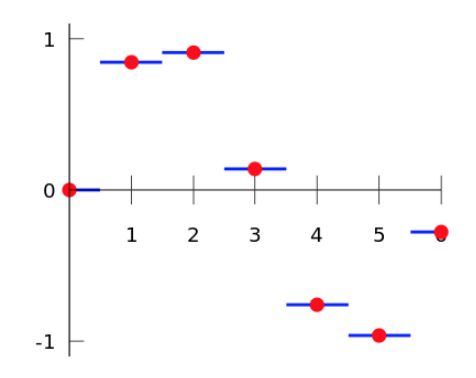

#### 2.2.2. Linear spline
A practical definition of a linear spline is to connect each of the data points with a line. Let each data point be labeled $x_i\in\{x_1,x_2,...x_N\}$. Let the linear function between points $x_i$ and $x_{i+1}$ be defined as the following line,
\begin{equation*}
  f_{i}(x) = a_i x + b_i
\end{equation*}
The solution for $a_i$ and $b_i$ is just the two-point equation for a line.
\begin{equation*}
  a_i = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} \quad b_i = f(x_i) - a_i x_i
\end{equation*}
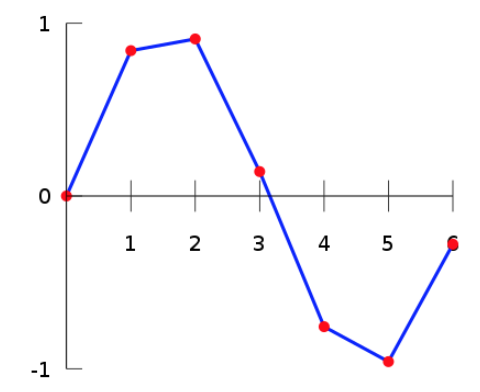

#### 2.2.3. Cubic spline
A cubic spline fits a cubic polynomial between points $x_i$ and $x_{i+1}$. Let the cubic polynomial between $x_i$ and $x_{i+1}$ defined as the following,
\begin{equation*}
  f_{i}(x) = a_i x^3 + b_i x^2 + c_i x + d_i
\end{equation*}
The cubic polynomial must satisfy four conditions to pin down the four parameters $a_i$, $b_i$, $c_i$, and $d_i$. The polynomial must pass through both end points (two conditions) and the second derivatives must be zero at the end points (two conditions).
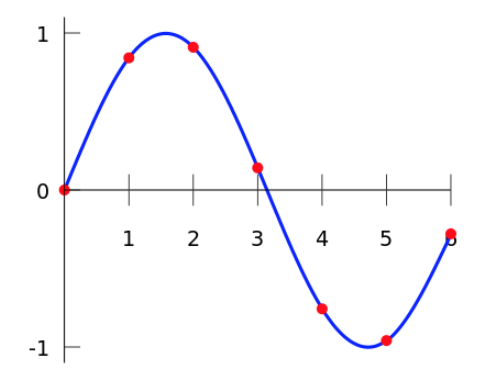

## 3. Examples

### 3.1. Fertility rates
The U.S. National Vital Statistics Reports, Volume 64, Number 1,    January 15, 2015, Table 3, final 2013 data [http://www.cdc.gov/nchs/data/nvsr/nvsr64/nvsr64_01.pdf](http://www.cdc.gov/nchs/data/nvsr/nvsr64/nvsr64_01.pdf) shows number of births per 1,000 females by age group

<IPython.core.display.Javascript object>


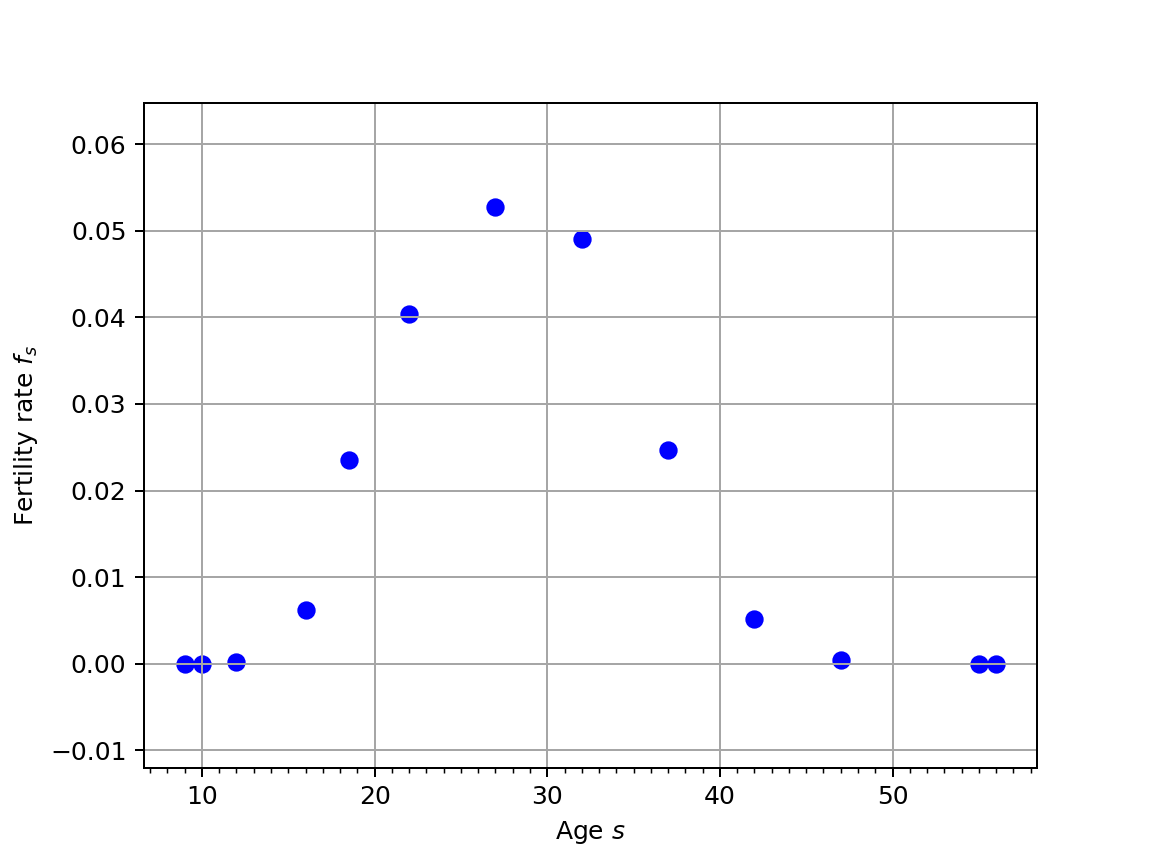

Text(0, 0.5, 'Fertility rate $f_{s}$')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib notebook

# Hard code input births data by age group
# Add two zeros on the end of each vector
# Age bins are 9, 10, 10-14, 15-17, 18-19, 20-24, 25-29, 30-34, 35-39,
# 40-44, 45-49, 55, 56. First two and last two are not data

fert_data = (np.array([0.0, 0.0, 0.3, 12.3, 47.1, 80.7, 105.5, 98.0,
                       49.3, 10.4, 0.8, 0.0, 0.0]) / 2000)
age_midp = np.array([9, 10, 12, 16, 18.5, 22, 27, 32, 37, 42, 47,
                     55, 56])

fig, ax = plt.subplots()
plt.scatter(age_midp, fert_data, s=40, c='blue', marker='o',
            label='Data')
# for the minor ticks, use no labels; default NullFormatter
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.xlabel(r'Age $s$')
plt.ylabel(r'Fertility rate $f_{s}$')

<IPython.core.display.Javascript object>


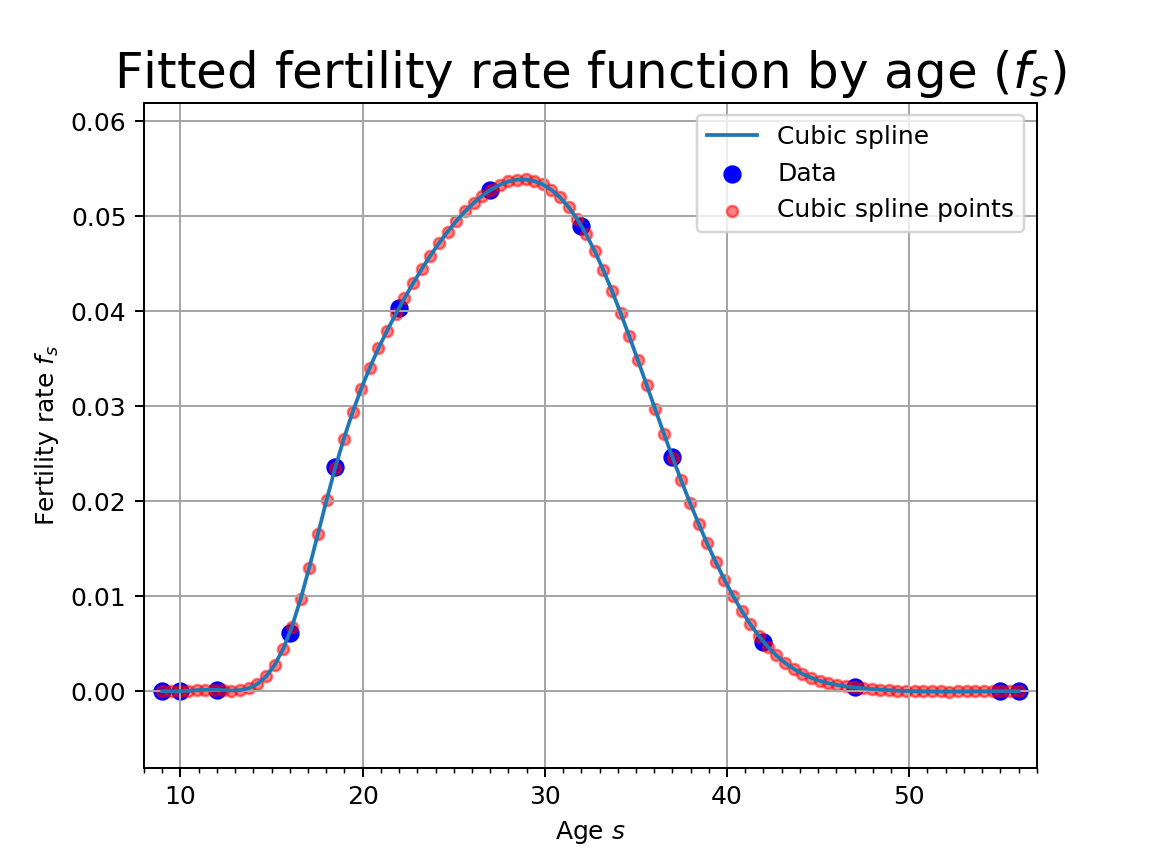

In [2]:
import scipy.interpolate as si

fert_func = si.interp1d(age_midp, fert_data, kind='cubic')

age_fine = np.linspace(age_midp.min(), age_midp.max(), 100)
fert_fine = fert_func(age_fine)

fig, ax = plt.subplots()
plt.scatter(age_midp, fert_data, s=40, c='blue', marker='o',
            label='Data')
plt.scatter(age_fine, fert_fine, s=20, c='red', marker='o',
            alpha=0.5, label='Cubic spline points')
plt.plot(age_fine, fert_fine, label='Cubic spline')
# for the minor ticks, use no labels; default NullFormatter
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Fitted fertility rate function by age ($f_{s}$)',
          fontsize=20)
plt.xlabel(r'Age $s$')
plt.ylabel(r'Fertility rate $f_{s}$')
plt.xlim((age_midp.min() - 1, age_midp.max() + 1))
plt.ylim((-0.15 * (fert_fine.max()),
          1.15 * (fert_fine.max())))
plt.legend(loc='upper right')

### 3.2. Interpolation through lots of points (regression)
This is what I have you doing in your problem set.
Good functions are ...